In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\practice\dataset1-master\Advertising.csv")

In [3]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

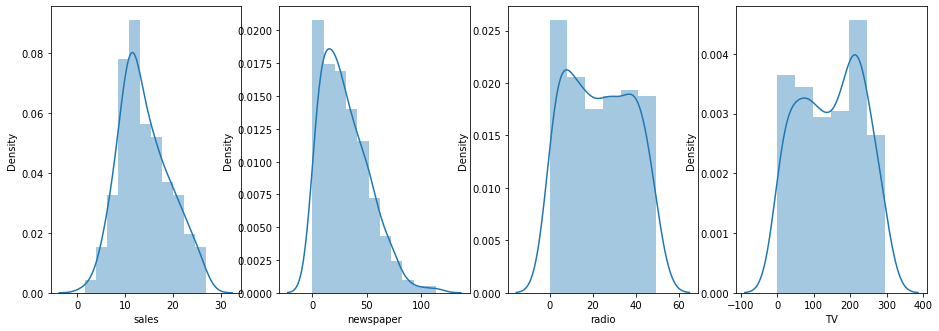

In [7]:
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(15.7, 5.27)

sns.distplot(data.sales, ax=axs[0]);
sns.distplot(data.newspaper, ax=axs[1]);
sns.distplot(data.radio, ax=axs[2]);
sns.distplot(data.TV, ax=axs[3]);

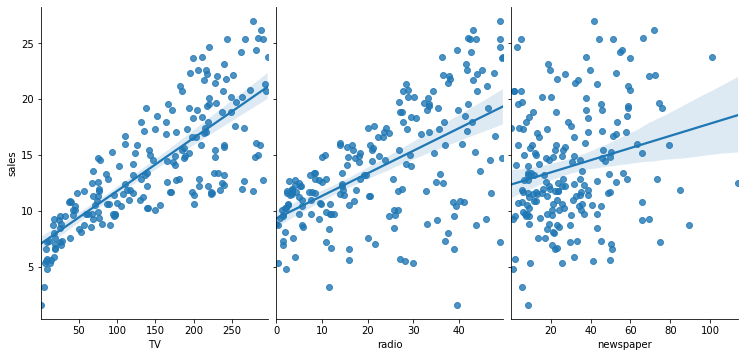

In [8]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=5, aspect=0.7, kind='reg');

In [9]:
data.TV.corr(data.sales)

0.7822244248616061

In [10]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


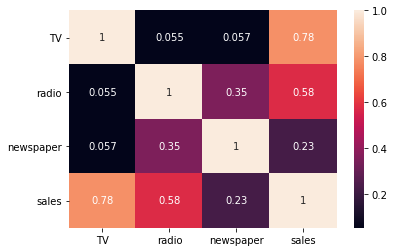

In [12]:
sns.heatmap(data.corr(), annot=True );

In [13]:
X = data[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [14]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [15]:
y = data.sales
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [16]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [19]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [20]:
print(linreg.intercept_)
print(linreg.coef_)

6.91197261886872
[0.04802945]


In [21]:
y_pred = linreg.predict(X_test)

In [22]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [23]:
print((10 + 0 + 20 + 10) / 4)

from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [24]:
print((10**2 + 0**2 + 20**2 + 10**2) / 4)

print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [25]:
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))

print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [26]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.210929707703542
